In [15]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
channel = "d0star"
date = "NOV02"

mesonCat = ""
mesonNum = 0
if (channel == "omega"):
    mesonCat = "OmegaCat"
    mesonNum = 1038
elif (channel == "phi"):
    mesonCat = "Phi3Cat"
    mesonNum = 1039
elif (channel == "d0starrho"):
    mesonCat = "D0StarRhoCat"
    mesonNum = 1040
elif (channel == "d0star"):
    mesonCat = "D0StarCat"
    mesonNum = 1041
else:
    raise Exception("Wrong channel.")

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))
dfSGN = ROOT.RDataFrame(chainSGN)
dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated"))


chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, mesonCat))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, mesonCat))
dfBKG = ROOT.RDataFrame(chainBKG)
dfBKG = (dfBKG.Define("scale", "w*lumiIntegrated"))

6771.939142034701
19779.305315570306


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


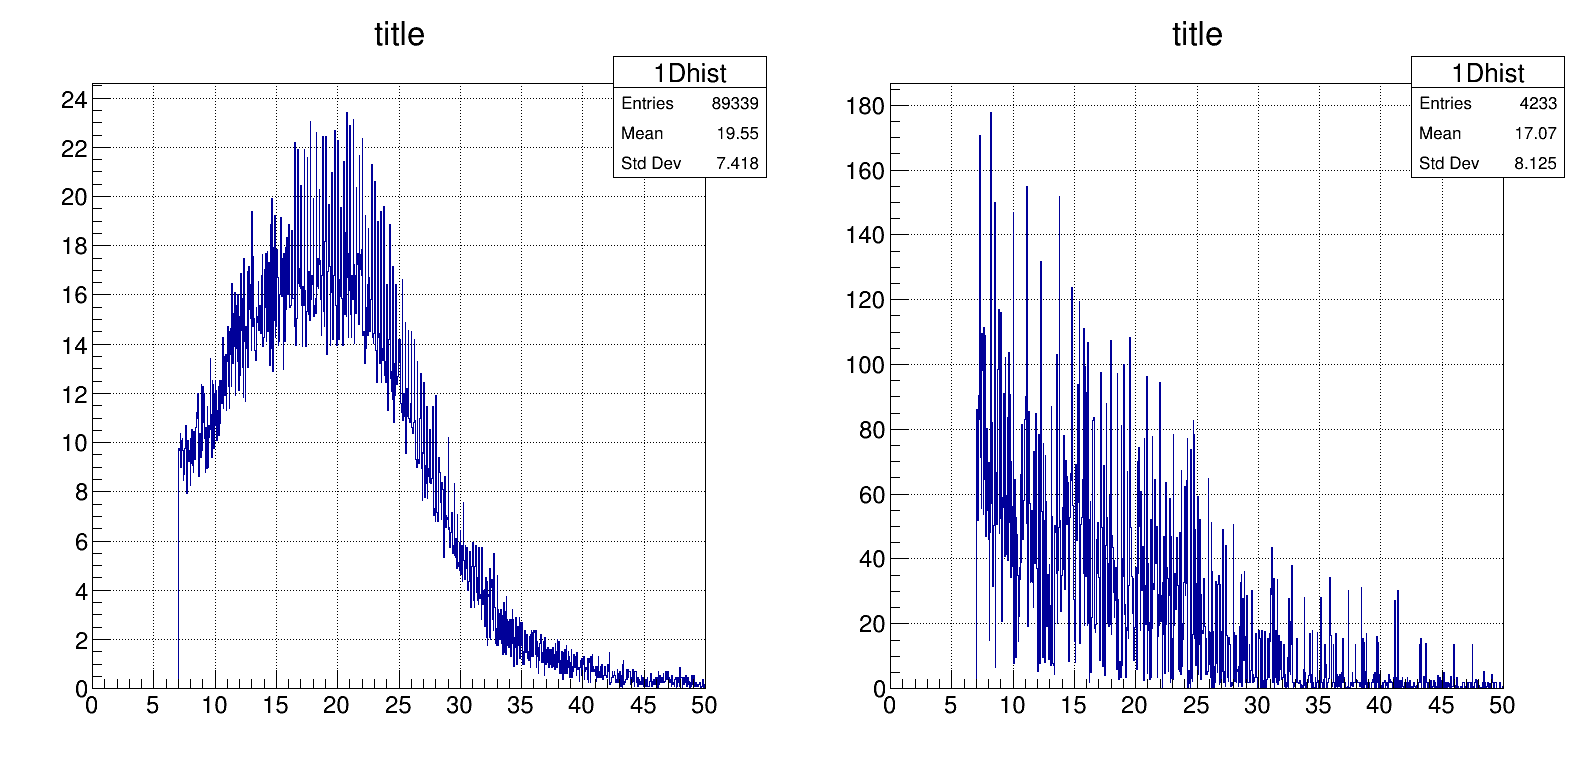

In [14]:
canvas = ROOT.TCanvas("canvas", "canvas", 1600, 800)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 1000, 0, 50
p = canvas.cd(1)
h1 = dfSGN.Histo1D(("1Dhist", "title", nbins, xlow, xhigh), "goodMeson_subleadtrk_pt", "scale").GetValue()
h1.Draw("hist")
p.SetGrid()

p = canvas.cd(2)

h2 = dfBKG.Histo1D(("1Dhist", "title", nbins, xlow, xhigh), "goodMeson_subleadtrk_pt", "scale").GetValue()
h2.Draw("hist")
p.SetGrid()

print(h1.Integral())
print(h2.Integral())

canvas.Draw()



0.0 6818.112148176015
0.0 20112.604030999257
0.05 6818.112148176015
0.05 20112.604030999257
0.1 6818.112148176015
0.1 20112.604030999257
0.15000000000000002 6818.112148176015
0.15000000000000002 20112.604030999257
0.2 6818.112148176015
0.2 20112.604030999257
0.25 6818.112148176015
0.25 20112.604030999257
0.30000000000000004 6818.112148176015
0.30000000000000004 20112.604030999257
0.35000000000000003 6818.112148176015
0.35000000000000003 20112.604030999257
0.4 6818.112148176015
0.4 20112.604030999257
0.45 6818.112148176015
0.45 20112.604030999257
0.5 6818.112148176015
0.5 20112.604030999257
0.55 6818.112148176015
0.55 20112.604030999257
0.6000000000000001 6818.112148176015
0.6000000000000001 20112.604030999257
0.65 6818.112148176015
0.65 20112.604030999257
0.7000000000000001 6818.112148176015
0.7000000000000001 20112.604030999257
0.75 6818.112148176015
0.75 20112.604030999257
0.8 6818.112148176015
0.8 20112.604030999257
0.8500000000000001 6818.112148176015
0.8500000000000001 20112.60403

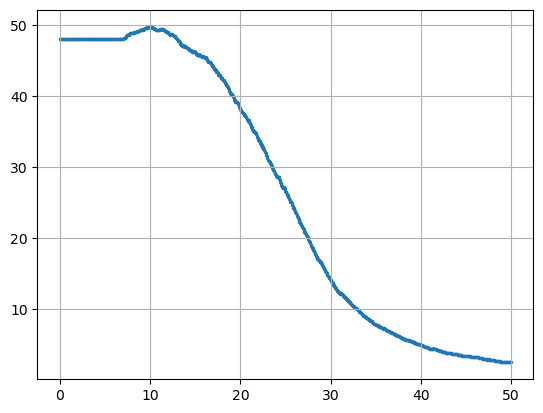

In [22]:
#for xlow in range

#.Integral(h1.FindBin(xlow), h1.FindBin(xhigh))
xhigh = 500
vals = np.linspace(0, 50, 1001)
significances = []
for v in vals:
    s = h1.Integral(h1.FindBin(v), h1.FindBin(xhigh))
    b = h2.Integral(h2.FindBin(v), h2.FindBin(xhigh))
    print(v, s)
    print(v, b)
    significances.append(s/np.sqrt(b))

plt.scatter(vals, significances, s=2.0)
plt.grid()
plt.show()
